In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 23.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yaml
import shutil

source_path = '/kaggle/input/all-human-with-pool/data.yaml'  
destination_path = '/kaggle/working/data.yaml'         


shutil.copy(source_path, destination_path)

with open(destination_path, 'r') as file:
    data = yaml.safe_load(file)

print("Original YAML content:")
print(data)



Original YAML content:
{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['human'], 'roboflow': {'workspace': 'rahma-2csx6', 'project': 'all-human-dataset-pool', 'version': 2, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/rahma-2csx6/all-human-dataset-pool/dataset/2'}}


In [ ]:

data['train'] = '/kaggle/input/all-human-with-pool/train/images'  
data['val'] = '/kaggle/input/all-human-with-pool/valid/images'     
data['test'] = '/kaggle/input/all-human-with-pool/test/images'      


In [ ]:

with open(destination_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"Modified YAML saved at: {destination_path}")

Modified YAML saved at: /kaggle/working/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11s.pt") 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 148MB/s]


In [ ]:


import torch
torch.cuda.empty_cache()

model.train(
    data='/kaggle/working/data.yaml', 
    epochs=50,         
    batch=32,          
    imgsz=640,         
    workers=4,          
    optimizer='Adam',   
    lr0=0.0001,          
    patience=10 ,        
    save_period=2


)


Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=2, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 6.05MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/all-human-with-pool/train/labels... 2071 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2071/2071 [00:06<00:00, 302.99it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/all-human-with-pool/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 37, len(boxes) = 5762. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/all-human-with-pool/valid/labels... 583 images, 0 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:02<00:00, 247.45it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/all-human-with-pool/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.54G      2.208      3.321      1.499        109        640: 100%|██████████| 65/65 [00:40<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]


                   all        583       1011      0.378      0.426      0.324      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.98G          2      1.498      1.344         77        640: 100%|██████████| 65/65 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.648      0.615      0.642      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.98G      1.939      1.338      1.326         90        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        583       1011      0.726      0.681      0.737      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         9G      1.903      1.258      1.279         69        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        583       1011      0.741      0.705      0.754      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         9G      1.876      1.216      1.284        115        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.786      0.735      0.776      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         9G      1.836      1.153      1.259         96        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        583       1011      0.823      0.771      0.826      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         9G      1.792      1.128      1.248         65        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        583       1011       0.82      0.769      0.824      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         9G      1.797      1.093      1.244        107        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        583       1011      0.819      0.779      0.826      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         9G      1.784      1.067      1.241         58        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]

                   all        583       1011       0.79      0.801      0.838      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         9G      1.758      1.044      1.224         51        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.822      0.745      0.826      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         9G      1.739       1.01      1.232         63        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        583       1011       0.86        0.8       0.87      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         9G      1.723      1.006      1.215         61        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        583       1011      0.826      0.821      0.866      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         9G      1.711     0.9843      1.197         76        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        583       1011      0.842      0.828      0.868      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         9G      1.686     0.9635      1.182         51        640: 100%|██████████| 65/65 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        583       1011      0.871      0.816      0.877       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         9G      1.677     0.9462      1.183        104        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        583       1011      0.861      0.813      0.872      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         9G      1.671     0.9165      1.183         97        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        583       1011      0.868      0.826      0.875      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         9G      1.666      0.924      1.176         94        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        583       1011      0.854       0.84      0.874      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         9G      1.653     0.9035      1.167        101        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.858      0.835      0.874      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         9G      1.616     0.8847      1.164        106        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        583       1011      0.868      0.833       0.88      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         9G      1.625     0.8707      1.153         98        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        583       1011      0.869      0.817      0.878      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         9G      1.595     0.8555      1.144        121        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        583       1011      0.836      0.847      0.876      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         9G      1.596     0.8452      1.141        177        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        583       1011      0.867      0.829      0.868      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         9G      1.592     0.8388      1.155         59        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

                   all        583       1011      0.873      0.824      0.874      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         9G      1.587     0.8281      1.148         83        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.864      0.852      0.889      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         9G      1.582     0.8271      1.144         79        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        583       1011      0.858      0.845      0.879      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         9G      1.563     0.8082      1.122         98        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011       0.87      0.842      0.888       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         9G       1.53     0.8059      1.131         50        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.871      0.836      0.882       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         9G      1.543     0.7971      1.118         72        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        583       1011      0.872      0.839      0.882      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         9G      1.505     0.7714      1.115         68        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.867      0.861      0.891      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         9G      1.516     0.7722      1.122        123        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.877      0.856      0.894      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         9G      1.522     0.7612      1.115         47        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        583       1011      0.861      0.844      0.874      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         9G      1.492     0.7529      1.105         63        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.881      0.853      0.888      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         9G      1.495     0.7493      1.099         63        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        583       1011       0.87      0.861       0.89       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         9G      1.493     0.7491      1.094         83        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        583       1011      0.875      0.856      0.891      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         9G       1.47     0.7374      1.091        102        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.876      0.864      0.901      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         9G      1.458     0.7218      1.084         75        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        583       1011       0.88      0.861      0.893      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         9G      1.463     0.7234      1.089         85        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        583       1011      0.894      0.873      0.902      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         9G      1.449     0.7183      1.093         83        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        583       1011      0.876      0.867      0.898      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         9G      1.445     0.7138      1.087         83        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        583       1011      0.879      0.862      0.887      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         9G       1.43      0.709      1.078        103        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        583       1011      0.878      0.858      0.893      0.478


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         9G      1.432     0.6597      1.082         49        640: 100%|██████████| 65/65 [00:39<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        583       1011      0.878      0.858       0.89      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         9G      1.418     0.6531      1.077         67        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        583       1011      0.878      0.867      0.901      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         9G      1.391     0.6385      1.068         51        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        583       1011      0.886      0.857      0.894      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         9G      1.377     0.6341       1.06         44        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.21it/s]

                   all        583       1011      0.871      0.865      0.893      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         9G      1.371     0.6217      1.056         44        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        583       1011      0.874      0.875      0.898      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         9G      1.364     0.6263      1.059         34        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.873      0.872      0.896       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         9G      1.347     0.6116      1.048         44        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        583       1011      0.875      0.869      0.892      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         9G      1.348     0.6139      1.058         63        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.881      0.879      0.896      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         9G      1.349     0.6104      1.058         39        640: 100%|██████████| 65/65 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        583       1011      0.879      0.875      0.895      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         9G       1.35     0.6119      1.053         85        640: 100%|██████████| 65/65 [00:38<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        583       1011      0.878      0.873      0.893      0.481



50 epochs completed in 0.611 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


                   all        583       1011      0.885      0.861        0.9      0.483


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4b1039cd00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:

metrics = model.val()

Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /kaggle/input/all-human-with-pool/valid/labels... 583 images, 0 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<00:00, 674.08it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/all-human-with-pool/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]


                   all        583       1011       0.88      0.866      0.901      0.483


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.1ms preprocess, 5.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


In [ ]:

fine_tuned_model = YOLO('runs/detect/train/weights/best.pt')
metrics = fine_tuned_model.val(data='/kaggle/working/data.yaml', split='test')
results = fine_tuned_model.predict(source='/kaggle/input/all-human-with-pool/test/images', save=True)


Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /kaggle/input/all-human-with-pool/test/labels... 284 images, 0 backgrounds, 0 corrupt: 100%|██████████| 284/284 [00:00<00:00, 342.33it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/all-human-with-pool/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.66it/s]


                   all        284        492      0.856      0.854      0.876      0.459


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.1ms preprocess, 6.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val

image 1/284 /kaggle/input/all-human-with-pool/test/images/0KVc_11_png_jpg.rf.80f3d84c7025b4efddbbcfbb414a8d1a.jpg: 640x640 1 human, 9.6ms
image 2/284 /kaggle/input/all-human-with-pool/test/images/0KVc_1_png_jpg.rf.d11526b77ecce7a368876cf172131280.jpg: 640x640 1 human, 8.4ms
image 3/284 /kaggle/input/all-human-with-pool/test/images/0KVc_22_png_jpg.rf.c69bef42ad4ffce6b23ffe8a0ba50b0b.jpg: 640x640 4 humans, 8.3ms
image 4/284 /kaggle/input/all-human-with-pool/test/images/0KVc_23_png_jpg.rf.bd436029de5768439aee75c85b25372b.jpg: 640x640 3 humans, 8.3ms
image 5/284 /kaggle/input/all-human-with-pool/test/images/0KVc_25_png_jpg.rf.0c060acd035c110d984cc2065fe6e814.jpg: 640x640 2 humans, 8.3ms
image 6/284 /kaggle/input/all-human-with-pool/test/images/0KVc_3_png_jpg.rf.0d8121edaa6d4678c6370449b483c087.jpg: 640x640 1 human, 8.3ms
image 7/284 /kaggle/input/all-human-with-pool/test/imag

In [9]:
results = fine_tuned_model.predict(source='/kaggle/input/all-human-with-pool/test/images', save=True, save_txt=True, save_conf=True)



image 1/284 /kaggle/input/all-human-with-pool/test/images/0KVc_11_png_jpg.rf.80f3d84c7025b4efddbbcfbb414a8d1a.jpg: 640x640 1 human, 8.6ms
image 2/284 /kaggle/input/all-human-with-pool/test/images/0KVc_1_png_jpg.rf.d11526b77ecce7a368876cf172131280.jpg: 640x640 1 human, 8.3ms
image 3/284 /kaggle/input/all-human-with-pool/test/images/0KVc_22_png_jpg.rf.c69bef42ad4ffce6b23ffe8a0ba50b0b.jpg: 640x640 4 humans, 8.3ms
image 4/284 /kaggle/input/all-human-with-pool/test/images/0KVc_23_png_jpg.rf.bd436029de5768439aee75c85b25372b.jpg: 640x640 3 humans, 8.3ms
image 5/284 /kaggle/input/all-human-with-pool/test/images/0KVc_25_png_jpg.rf.0c060acd035c110d984cc2065fe6e814.jpg: 640x640 2 humans, 8.4ms
image 6/284 /kaggle/input/all-human-with-pool/test/images/0KVc_3_png_jpg.rf.0d8121edaa6d4678c6370449b483c087.jpg: 640x640 1 human, 8.3ms
image 7/284 /kaggle/input/all-human-with-pool/test/images/0KVc_4_png_jpg.rf.1f278ca44f787603f10fab443d744f02.jpg: 640x640 1 human, 8.3ms
image 8/284 /kaggle/input/all-hum

# **Train Validate graph**

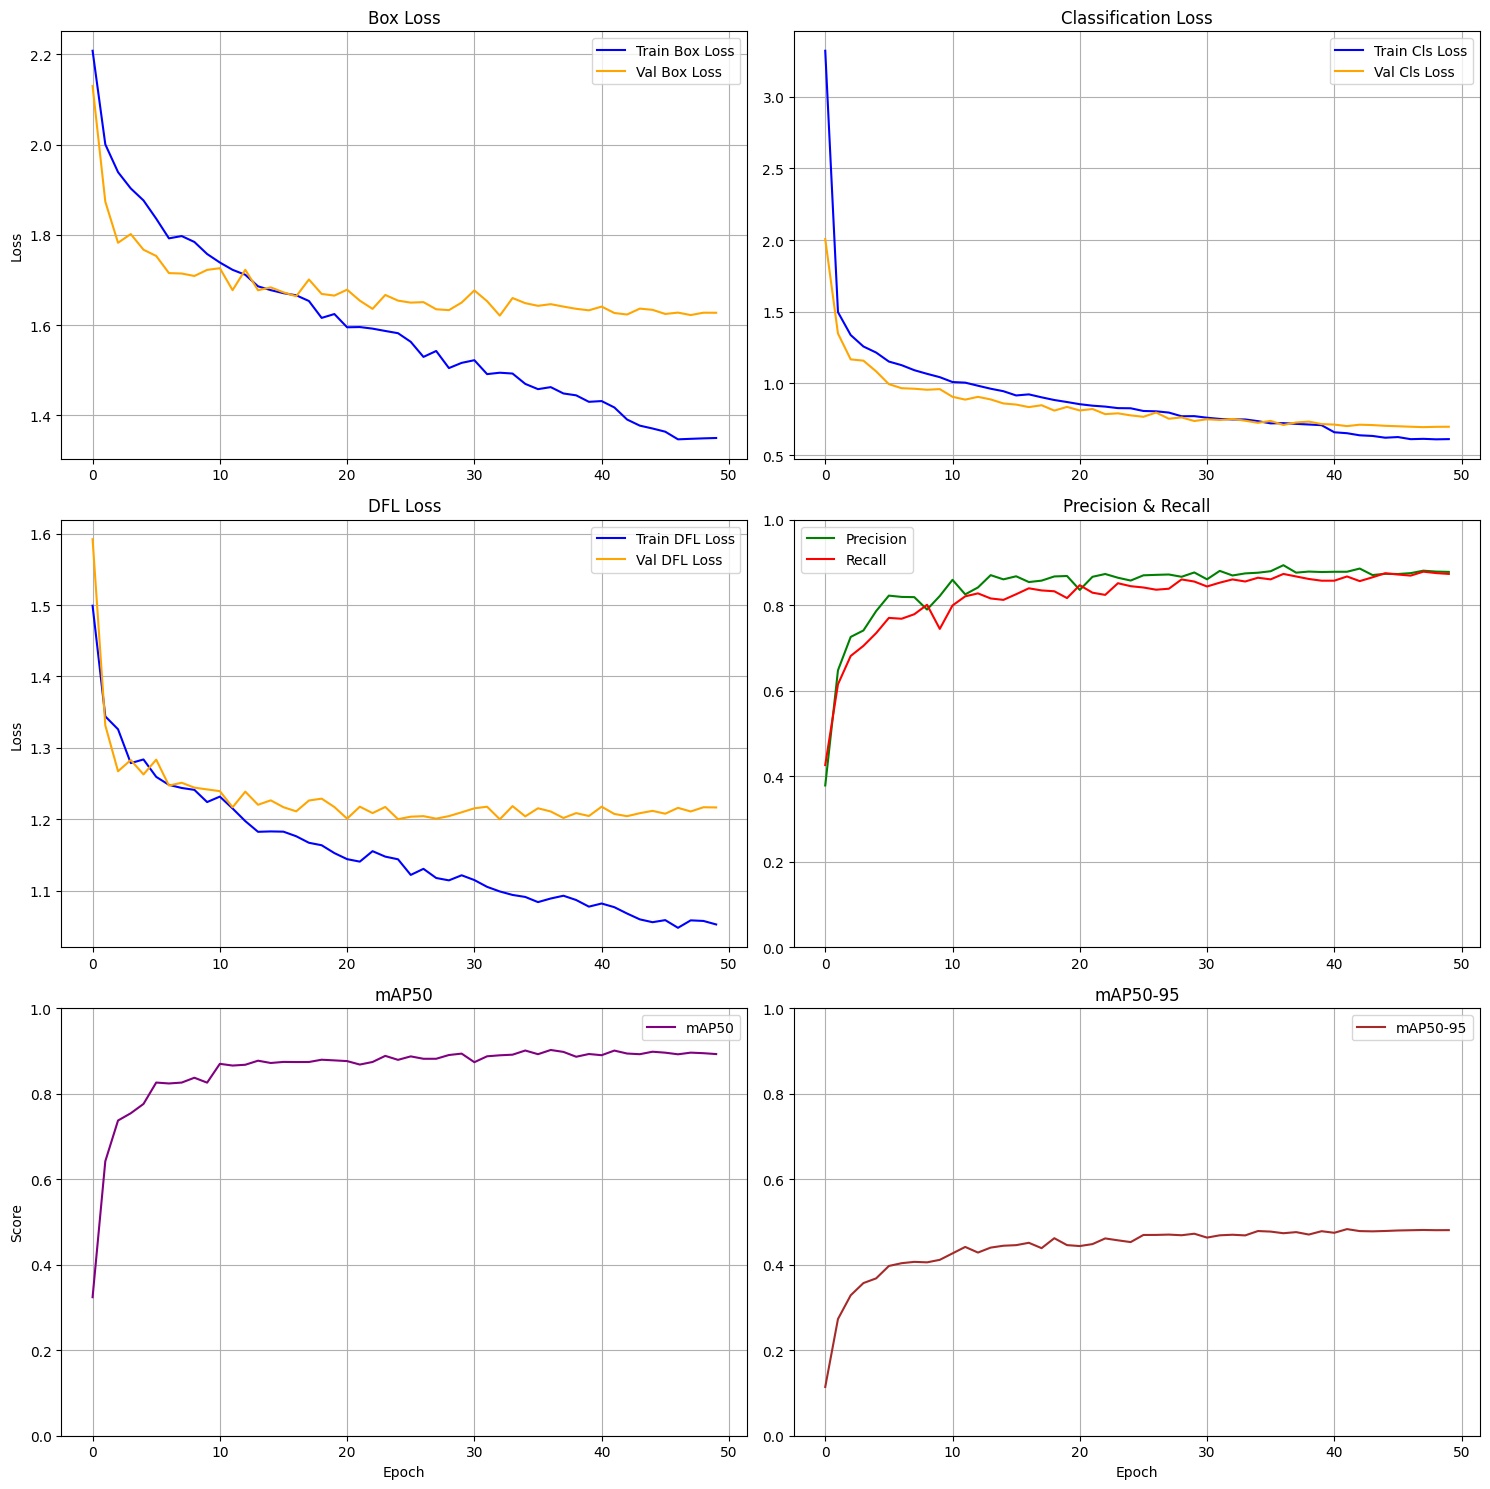

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def plot_combined_metrics(results_dir='runs/detect/train'):
    results_file = None
    for f in ['results.csv', 'results.txt', 'results.yaml']:
        if os.path.exists(os.path.join(results_dir, f)):
            results_file = os.path.join(results_dir, f)
            break
    
    if not results_file:
        print(f"No results file found in {results_dir}")
        return

    if results_file.endswith('.csv'):
        df = pd.read_csv(results_file)
    elif results_file.endswith('.yaml'):
        import yaml
        with open(results_file) as f:
            results = yaml.safe_load(f)
        df = pd.DataFrame(results)
    else:  
        data = []
        with open(results_file) as f:
            for line in f:
                if line.strip():
                    data.append([float(x) for x in line.strip().split()])
        df = pd.DataFrame(data)
   
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    axs[0,0].plot(df['train/box_loss'], label='Train Box Loss', color='blue')
    axs[0,0].plot(df['val/box_loss'], label='Val Box Loss', color='orange')
    axs[0,0].set_title('Box Loss')
    axs[0,0].set_ylabel('Loss')
    axs[0,0].legend()
    axs[0,0].grid(True)
    
  
    axs[0,1].plot(df['train/cls_loss'], label='Train Cls Loss', color='blue')
    axs[0,1].plot(df['val/cls_loss'], label='Val Cls Loss', color='orange')
    axs[0,1].set_title('Classification Loss')
    axs[0,1].legend()
    axs[0,1].grid(True)
    

    axs[1,0].plot(df['train/dfl_loss'], label='Train DFL Loss', color='blue')
    axs[1,0].plot(df['val/dfl_loss'], label='Val DFL Loss', color='orange')
    axs[1,0].set_title('DFL Loss')
    axs[1,0].set_ylabel('Loss')
    axs[1,0].legend()
    axs[1,0].grid(True)
    

    axs[1,1].plot(df['metrics/precision(B)'], label='Precision', color='green')
    axs[1,1].plot(df['metrics/recall(B)'], label='Recall', color='red')
    axs[1,1].set_title('Precision & Recall')
    axs[1,1].set_ylim(0, 1)
    axs[1,1].legend()
    axs[1,1].grid(True)
    
    axs[2,0].plot(df['metrics/mAP50(B)'], label='mAP50', color='purple')
    axs[2,0].set_title('mAP50')
    axs[2,0].set_ylabel('Score')
    axs[2,0].set_xlabel('Epoch')
    axs[2,0].set_ylim(0, 1)
    axs[2,0].legend()
    axs[2,0].grid(True)
    

    axs[2,1].plot(df['metrics/mAP50-95(B)'], label='mAP50-95', color='brown')
    axs[2,1].set_title('mAP50-95')
    axs[2,1].set_xlabel('Epoch')
    axs[2,1].set_ylim(0, 1)
    axs[2,1].legend()
    axs[2,1].grid(True)
    
    plt.tight_layout()
    plt.savefig('combined_metrics.png')
    plt.show()

plot_combined_metrics()